In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
df= pd.read_csv("Height_weight.csv")
df =df.dropna()

In [3]:
df.keys()

Index(['Height', 'Weight'], dtype='object')

In [4]:
x=df[["Height"]].values
y=df["Weight"].values

In [5]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


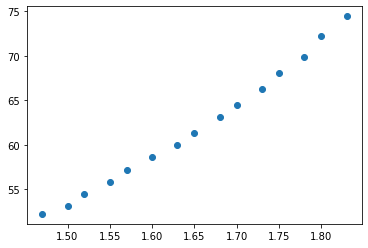

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
### start your ML
#!pip install sklearn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model= LinearRegression()
model = model.fit(x,y)

In [10]:
#y = mx+ c

In [11]:
m = model.coef_
c = model.intercept_
m,c

(array([61.27218654]), -39.06195591884392)

In [12]:
Pred = m*1.59 + c
Pred

array([58.36082068])

In [13]:
model.predict([[1.59],[1.27],[1.65]])

array([58.36082068, 38.75372099, 62.03715188])

In [14]:
pred_weight = model.predict(x)
pred_weight

array([51.0081583 , 52.84632389, 54.07176763, 55.90993322, 57.13537695,
       58.97354255, 60.81170814, 62.03715188, 63.87531747, 65.1007612 ,
       66.9389268 , 68.16437053, 70.00253613, 71.22797986, 73.06614545])

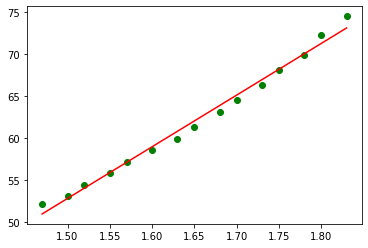

In [15]:
#graph plot
plt.scatter(x,y, c = "green")
plt.plot(x, pred_weight, c = "red")
plt.show()

In [16]:
newH = 4.5

In [17]:
model.predict([[newH]])[0]

236.6628835206539

In [18]:
NewDf = pd.DataFrame({
    "Real":y,
    "Pred":pred_weight
})

In [19]:
NewDf

,Real,Pred
0,52.21,51.008158
1,53.12,52.846324
2,54.48,54.071768
3,55.84,55.909933
4,57.20,57.135377
5,58.57,58.973543
6,59.93,60.811708
7,61.29,62.037152
8,63.11,63.875317
9,64.47,65.100761


In [20]:
### fIND aCCURACY...
from sklearn.metrics import r2_score

In [21]:
r2_score(y, pred_weight)*100

98.91969224457968

# Multi Linear Regression

In [22]:
df = pd.read_csv("loanf.csv")

In [23]:
df.columns

Index(['Interest.Rate', 'FICO.Score', 'Loan.Length', 'Monthly.Income',
       'Loan.Amount'],
      dtype='object')

In [24]:
x = df[["FICO.Score","Loan.Amount"]].values
y = df["Interest.Rate"]

In [25]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model = model.fit(x,y)

In [27]:
model.predict([[500,200]])

array([28.70373678])

In [28]:
### Create A interact panel

In [29]:
def InterestRate(FICO, Amount):
    out = model.predict([[FICO, Amount]])
    out = out[0]
    print("For {fico} score with  {amount} you have to pay {interest}% interest Rate".format(fico=FICO, amount=Amount, interest= str(out)[:5]))

In [30]:
from ipywidgets import interact

In [31]:
interact(InterestRate, FICO=(50,120), Amount=(200, 100000))

interactive(children=(IntSlider(value=85, description='FICO', max=120, min=50), IntSlider(value=50100, descrip…

<function __main__.InterestRate(FICO, Amount)>